## 1. Importação de bibliotecas

In [128]:
import pandas as pd

In [129]:
import numpy as np

In [130]:
import matplotlib.pyplot as plt


In [131]:
import plotly.express as px

## 2. Extração dos Dados
Objetivos
1.   Carregar os dados diretamente da API utilizando Python.
2.   Converter os dados para um DataFrame do Pandas para facilitar a manipulação.

In [132]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json' #copiar a url do JSON numa variavel

In [133]:
df = pd.read_json(url) #ler em formato Json

In [134]:
df.head() #visualizar os dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 3. Conhecendo o Dataset

1. Explorar as colunas do dataset e verificar seus tipos de dados.
2. Consultar o dicionário para entender melhor os significados das variáveis.
3. Identificar as colunas mais relevantes para a análise de evasão.




### 3.1 Explorar as colunas do dataset e verificar seus tipos de dados.

In [135]:
df.shape #verificar o total de linhas e colunas do df original

(7267, 6)

In [136]:
df.columns #verificar o nome das colunas

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [137]:
df.info() #verificar as informações do DF, como o Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### 3.2. Consultar o dicionário para entender melhor os significados das variáveis.


* customerID: número de identificação único de cada cliente
* Churn: se o cliente deixou ou não a empresa
* gender: gênero (masculino e feminino)
* SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* Partner: se o cliente possui ou não um parceiro ou parceira
* Dependents: se o cliente possui ou não dependentes
* tenure: meses de contrato do cliente
* PhoneService: assinatura de serviço telefônico
* MultipleLines: assisnatura de mais de uma linha de telefone
* InternetService: assinatura de um provedor internet
* OnlineSecurity: assinatura adicional de segurança online
* OnlineBackup: assinatura adicional de backup online
* DeviceProtection: assinatura adicional de proteção no dispositivo
* TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
* StreamingTV: assinatura de TV a cabo
* StreamingMovies: assinatura de streaming de filmes
* Contract: tipo de contrato
* PaperlessBilling: se o cliente prefere receber online a fatura
* PaymentMethod: forma de pagamento
* Charges.Monthly: total de todos os serviços do cliente por mês
* Charges.Total: total gasto pelo cliente

### 3.3 Identificar as colunas mais relevantes para a análise de evasão.
Campo para verificar os dados de colunas aninhadas e verificar informações
relavantes nelas

In [138]:
data_customer = pd.json_normalize(df['customer'])
data_phone = pd.json_normalize(df['phone'])
data_internet = pd.json_normalize(df['internet'])
data_account = pd.json_normalize(df['account'])

In [139]:
data_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [140]:
data_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [141]:
data_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [142]:
data_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


### 3.4 Criação de um DF normalizado com todas as colunas separadas do DF original
Remoção das colunas aninhadas e junção das colunas geradas acima para um DF normalizado

In [143]:
df_base = df.drop(columns=['customer', 'phone', 'internet', 'account']) #removendo as colunas aninhadas
df_normalizado = pd.concat([df_base, data_customer, data_phone, data_internet, data_account], axis=1) #juntar tudo num dataframe aninhado

## 4. Verificando Inconsistências nos Dados

Neste passo, verifique se há problemas nos dados que possam afetar a análise. Fique atento a valores ausentes, duplicados, erros de formatação e inconsistências nas categorias. Esse processo é essencial para garantir que os dados estejam prontos para as próximas etapas.

Análise dessa TASK:
1. Foi observado que o DF não possui valores nulos ,duplicados
2. Foi observado que 224 Clientes estão sem dados de Churn, ou seja, não sabemos se saiu da empresa ou não, e outros 11 dados de Charges.Total estão com resultados em branco

Verifica se existe valores nulos, NA , duplicados

In [144]:
df_normalizado.isnull() #Verificar se existe valores nulos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7263,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


se existe algum valor NULL ou NA

In [145]:
df_normalizado.isnull().values.any()

np.False_

verificar se o DF possui dados null

In [146]:
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


verificar se existe valores duplicados

In [147]:
df_normalizado.duplicated().sum()

np.int64(0)

verificar se existe ID repetido

In [148]:
df_normalizado['customerID'].nunique()

7267

Verificação de dados em branco '' ou ' '

In [149]:
df_normalizado.apply(lambda col: (col.astype(str).str.strip() == '').sum()) #verifica dados ausentes em branco

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


Verificar se a coluna Churn possui dados vazios

In [150]:
dados_churn_vazios = df_normalizado[df_normalizado['Churn'].astype(str).str.strip() == '']

In [151]:
dados_churn_vazios

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


 Remover clientes que estão com os valores de Churn ausentes, pois pode influenciar na análise

In [152]:
df_normalizado = df_normalizado[df_normalizado['Churn'].astype(str).str.strip() != '']

Agora não existe nenhum cliente com dados de Churn em brancos ou null

In [153]:
df_normalizado.apply(lambda col: (col.astype(str).str.strip() == '').sum()) #verifica os dados ausentes em branco

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


### Agora temos que verificar como tratar o Charges.Total que possuem valores em branco

De acordo com o dicionário de dados, o campo Charges.Total representa o total gasto pelo cliente durante todo o período do contrato, enquanto Charges.Monthly corresponde ao valor mensal pago pelos serviços contratados. Observou-se que, ao multiplicar Charges.Monthly pelo número de meses de contrato (tenure), obtém-se um valor aproximado ao Charges.Total, conforme verificado nos registros onde este campo está preenchido.
Logo, a ideia é realizar essa multiplicação para os campos de Charges.Total que estão em branco

In [154]:
dados_Charges_Total_vazios = df_normalizado[df_normalizado['Charges.Total'].astype(str).str.strip() == '']

In [155]:
dados_Charges_Total_vazios

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [156]:
df_normalizado[df_normalizado['tenure'] == 0]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


Observou-se que os registros em que o campo tenure é igual a 0 — identificados por meio da função df_normalizado[df_normalizado['tenure'] == 0] — correspondem aos mesmos casos em que o campo Charges.Total está em branco. Isso indica que o total de gastos do cliente não foi registrado porque o número de meses de contrato (tenure) ainda é igual a zero. Para mudar os valores em branco para 0 foi utlizado uma operação de multiplicação em os campos do tenure e os campos de Charges.Montly


In [157]:
mascara_vazios = df_normalizado['Charges.Total'].astype(str).str.strip() == ''
df_normalizado.loc[mascara_vazios, 'Charges.Total'] = (
    df_normalizado.loc[mascara_vazios, 'tenure'] *
    df_normalizado.loc[mascara_vazios, 'Charges.Monthly']
)

Agora todos os campos de Charges.Total estão com valores preenchidos

In [158]:
df_normalizado[mascara_vazios][['tenure', 'Charges.Monthly', 'Charges.Total']]

,tenure,Charges.Monthly,Charges.Total
975,0,56.05,0.0
1775,0,20.00,0.0
1955,0,61.90,0.0
2075,0,19.70,0.0
2232,0,20.25,0.0
2308,0,25.35,0.0
2930,0,73.35,0.0
3134,0,25.75,0.0
3203,0,52.55,0.0
4169,0,80.85,0.0


Verificar o tipo de cada coluna

In [159]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

Transformando o Charges.Total do tipo object to Float

In [160]:
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].astype(np.float64)

Identificar os valores unicos das colunas

In [161]:
for col in df_normalizado.columns:
    print(f"Coluna: {col}")
    print(df_normalizado[col].unique())
    print("-" * 40)

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------
Coluna: Churn
['No' 'Yes']
----------------------------------------
Coluna: gender
['Female' 'Male']
----------------------------------------
Coluna: SeniorCitizen
[0 1]
----------------------------------------
Coluna: Partner
['Yes' 'No']
----------------------------------------
Coluna: Dependents
['Yes' 'No']
----------------------------------------
Coluna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
----------------------------------------
Coluna: PhoneService
['Yes' 'No']
----------------------------------------
Coluna: MultipleLines
['No' 'Yes' 'No phone service']
----------------------------------------
Coluna: InternetService
['DSL' 'Fiber optic' 'No']


Alterando as colunas para lower

In [162]:
df_normalizado.columns = df_normalizado.columns.str.lower()

Trocando o sinal . de Charges.monthly e Charges.total para _

In [163]:
df_normalizado.columns = df_normalizado.columns.str.lower().str.replace('.', '_')

## 5. Coluna de Contas Diárias

In [164]:
df_normalizado['contas_diarias'] = df_normalizado['charges_monthly'] / 30
df_normalizado['contas_diarias'] = df_normalizado['contas_diarias'].round(2)

In [165]:
df_normalizado.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


## 6. Padronização e Transformação de Dados (Opcional)

Verificar as colunas que possuem valores de Yes e No para padronizar para 1 e 0

In [166]:
for col in df_normalizado.columns:
    valores = df_normalizado[col].dropna().unique()
    if set(valores).issubset({'Yes', 'No'}):
        print(f"{col}: contém apenas 'Yes' e 'No'")
    else:
        print(f"{col}: contém outros valores: {valores}")

customerid: contém outros valores: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn: contém apenas 'Yes' e 'No'
gender: contém outros valores: ['Female' 'Male']
seniorcitizen: contém outros valores: [0 1]
partner: contém apenas 'Yes' e 'No'
dependents: contém apenas 'Yes' e 'No'
tenure: contém outros valores: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phoneservice: contém apenas 'Yes' e 'No'
multiplelines: contém outros valores: ['No' 'Yes' 'No phone service']
internetservice: contém outros valores: ['DSL' 'Fiber optic' 'No']
onlinesecurity: contém outros valores: ['No' 'Yes' 'No internet service']
onlinebackup: contém outros valores: ['Yes' 'No' 'No internet service']
deviceprotection: contém outros valores: ['No' 'Yes' 'No internet service']
techsupport: contém out

Nota-se que as colunas que dependem de internetservice, se o internetservice == No as colunas estão com os Valores de "No internet service", logo podemos modificar esses valores para No, para padronizar para binário


In [167]:
df_filtrado = df_normalizado[df_normalizado['internetservice'] == 'No']

for col in df_filtrado.columns:
    print(f"Coluna: {col}")
    print(df_filtrado[col].unique())
    print("-" * 40)

Coluna: customerid
['0023-UYUPN' '0030-FNXPP' '0031-PVLZI' ... '9975-GPKZU' '9975-SKRNR'
 '9986-BONCE']
----------------------------------------
Coluna: churn
['No' 'Yes']
----------------------------------------
Coluna: gender
['Female' 'Male']
----------------------------------------
Coluna: seniorcitizen
[1 0]
----------------------------------------
Coluna: partner
['Yes' 'No']
----------------------------------------
Coluna: dependents
['No' 'Yes']
----------------------------------------
Coluna: tenure
[50  3  4 54 26 69 49 67 43 12 25 27  1 10 44 24 71  2 46 30  8 23  5 63
 32 16  9 15 40 65 70 72 48 52 41 11 57 18 20 28 29 38 13 59 53 56  6 61
  7 62 58 36 47 37 19 55 64 17 14 35 66 33 22 60 31 42 51 68 34 39 21 45
  0]
----------------------------------------
Coluna: phoneservice
['Yes']
----------------------------------------
Coluna: multiplelines
['Yes' 'No']
----------------------------------------
Coluna: internetservice
['No']
----------------------------------------
Col

Modificar os valores de "No internet service" para "No"

In [168]:
df_normalizado = df_normalizado.replace("No internet service", "No")

In [169]:
df_filtrado = df_normalizado[df_normalizado['internetservice'] == 'No']

for col in df_filtrado.columns:
    print(f"Coluna: {col}")
    print(df_filtrado[col].unique())
    print("-" * 40)

Coluna: customerid
['0023-UYUPN' '0030-FNXPP' '0031-PVLZI' ... '9975-GPKZU' '9975-SKRNR'
 '9986-BONCE']
----------------------------------------
Coluna: churn
['No' 'Yes']
----------------------------------------
Coluna: gender
['Female' 'Male']
----------------------------------------
Coluna: seniorcitizen
[1 0]
----------------------------------------
Coluna: partner
['Yes' 'No']
----------------------------------------
Coluna: dependents
['No' 'Yes']
----------------------------------------
Coluna: tenure
[50  3  4 54 26 69 49 67 43 12 25 27  1 10 44 24 71  2 46 30  8 23  5 63
 32 16  9 15 40 65 70 72 48 52 41 11 57 18 20 28 29 38 13 59 53 56  6 61
  7 62 58 36 47 37 19 55 64 17 14 35 66 33 22 60 31 42 51 68 34 39 21 45
  0]
----------------------------------------
Coluna: phoneservice
['Yes']
----------------------------------------
Coluna: multiplelines
['Yes' 'No']
----------------------------------------
Coluna: internetservice
['No']
----------------------------------------
Col

Verificar as colunas que só possuem No e Yes

In [170]:
colunas_objeto = df_normalizado.select_dtypes(include='object').columns

for col in colunas_objeto:
    valores = df_normalizado[col].dropna().unique()
    if set(valores).issubset({'Yes', 'No'}):
        print(f"{col}: contém apenas 'Yes' e 'No'")

churn: contém apenas 'Yes' e 'No'
partner: contém apenas 'Yes' e 'No'
dependents: contém apenas 'Yes' e 'No'
phoneservice: contém apenas 'Yes' e 'No'
onlinesecurity: contém apenas 'Yes' e 'No'
onlinebackup: contém apenas 'Yes' e 'No'
deviceprotection: contém apenas 'Yes' e 'No'
techsupport: contém apenas 'Yes' e 'No'
streamingtv: contém apenas 'Yes' e 'No'
streamingmovies: contém apenas 'Yes' e 'No'
paperlessbilling: contém apenas 'Yes' e 'No'


Modificar os valores Yes e No para 1 e 0

In [171]:
df_normalizado.replace({"Yes": 1, "No": 0}, inplace=True)

/tmp/ipython-input-171-3196438608.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Dataframe com as colunas com seus valores binários

In [172]:
df_normalizado.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


Mudar o nome das colunas para uma forma mais clara aos stakeholders


In [173]:
df_normalizado.rename(columns={'customerid':'ID_cliente',
                               'churn': 'status_saida_cliente',
                               'gender': 'genero',
                               'seniorcitizen': 'cliente_idoso',
                               'partner':'possui_parceiro',
                               'dependents': 'dependentes',
                               'tenure': 'duracao_contrato',
                               'charges_total': 'total_gasto_cliente',
                               'charges_monthly':'valor_mensal_cobrado',
                               'paymentmethod':'metodo_pagamento',
                               'paperlessbilling':'opcao_fatura_digital',
                               'contract':'contrato',
                               'phoneservice': 'servico_telefonia',
                               'multiplelines':'possui_multiplas_linhas',
                               'internetservice':'servico_internet',
                               'onlinesecurity':'seguranca_online',
                               'onlinebackup': 'backup_online',
                               'deviceprotection':'protecao_dispositivo',
                               'techsupport': 'suporte_tecnico'
                               }, inplace=True)

Dataframe final

In [174]:
df_normalizado.columns

Index(['ID_cliente', 'status_saida_cliente', 'genero', 'cliente_idoso',
       'possui_parceiro', 'dependentes', 'duracao_contrato',
       'servico_telefonia', 'possui_multiplas_linhas', 'servico_internet',
       'seguranca_online', 'backup_online', 'protecao_dispositivo',
       'suporte_tecnico', 'streamingtv', 'streamingmovies', 'contrato',
       'opcao_fatura_digital', 'metodo_pagamento', 'valor_mensal_cobrado',
       'total_gasto_cliente', 'contas_diarias'],
      dtype='object')

In [175]:
df_normalizado.head()

,ID_cliente,status_saida_cliente,genero,cliente_idoso,possui_parceiro,dependentes,duracao_contrato,servico_telefonia,possui_multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,streamingtv,streamingmovies,contrato,opcao_fatura_digital,metodo_pagamento,valor_mensal_cobrado,total_gasto_cliente,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


## 7. Análise descritiva
Para começar, realize uma análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

Analisando a coluna status_saida_cliente podemos verificar como se comporta esses dados:
* Contagem absoluta
* Porcentagem de saídas


In [176]:
df_normalizado['status_saida_cliente'].value_counts()

,count
status_saida_cliente,
0,5174
1,1869


73% de clientes ainda estão com contrato ativo, e 26% cancelaram o contrato

In [177]:
df_normalizado['status_saida_cliente'].value_counts(normalize=True) * 100

,proportion
status_saida_cliente,
0,73.463013
1,26.536987


Verificar o desvio padrão das colunas

In [178]:
df_normalizado.std(numeric_only=True)

,0
status_saida_cliente,0.441561
cliente_idoso,0.368612
possui_parceiro,0.499748
dependentes,0.458110
duracao_contrato,24.559481
servico_telefonia,0.295752
seguranca_online,0.452237
backup_online,0.475363
protecao_dispositivo,0.475038
suporte_tecnico,0.453895


In [179]:
std_series = df_normalizado.std(numeric_only=True).sort_values(ascending=True)

Desvio padrão das colunas do Dataframe

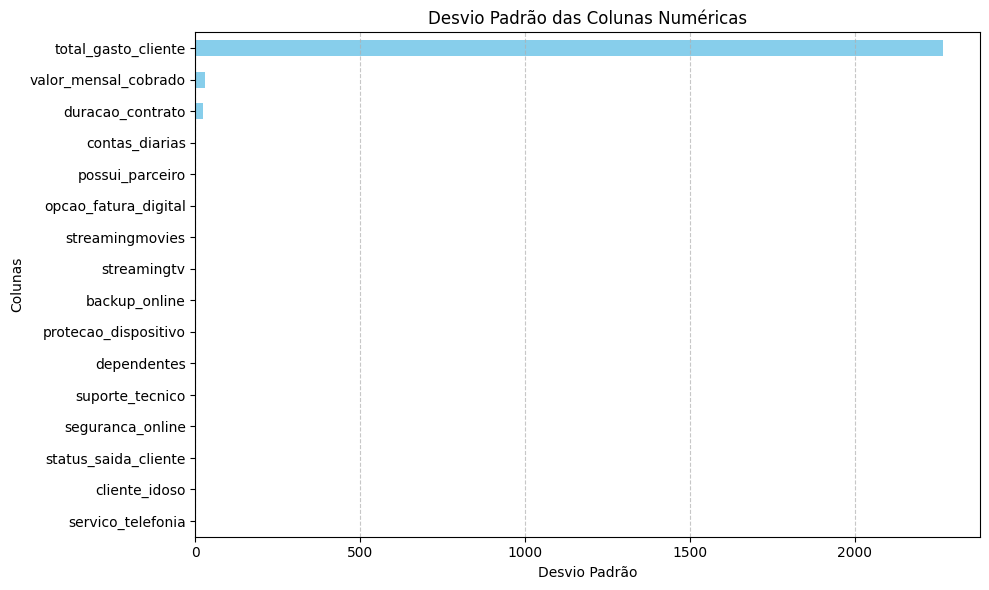

In [180]:
plt.figure(figsize=(10, 6))
std_series.plot(kind='barh', color='skyblue')

plt.title('Desvio Padrão das Colunas Numéricas')
plt.xlabel('Desvio Padrão')
plt.ylabel('Colunas')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Media e Mediana do valor mensal cobrado dos clientes, notou-se que o valor mensal tem média de 64 reais



In [181]:
media_mensal = df_normalizado['valor_mensal_cobrado'].mean()
mediana_mensal = df_normalizado['valor_mensal_cobrado'].median()

print(f"Média: {media_mensal}")
print(f"Mediana: {mediana_mensal}")

Média: 64.76169246059918
Mediana: 70.35


Media e Mediana da duração de contrato dos clientes

In [182]:
media_duracao_contrato = df_normalizado['duracao_contrato'].mean()
mediana_duracao_contrato = df_normalizado['duracao_contrato'].median()

print(f"Média: {media_duracao_contrato}")
print(f"Mediana: {mediana_duracao_contrato}")

Média: 32.37114865824223
Mediana: 29.0


## 8. Distribuição de Evasão

Por genero

In [183]:
px.histogram(df_normalizado, x = 'genero', text_auto=True, color='status_saida_cliente', barmode = 'group')

Por clientes idosos

In [184]:
fig = px.histogram(
    df_normalizado,
    x='cliente_idoso',
    text_auto=True,
    color='status_saida_cliente',
    barmode='group',
    category_orders={'cliente_idoso': [0, 1]}
)

# Muda os rótulos do eixo X
fig.update_xaxes(
    tickmode='array',
    tickvals=[0, 1],
    ticktext=['Não', 'Sim']
)

# Muda as legendas da cor (como antes)
fig.for_each_trace(
    lambda t: t.update(name='Saiu' if t.name == '1' else 'Permaneceu')
)

fig.show()

pela duração de contrato

In [185]:
px.histogram(df_normalizado, x = 'duracao_contrato', text_auto=True, color = 'status_saida_cliente', barmode='group')

Agrupar por duração contrato e status saída do cliente

In [186]:
#Agrupar por duração contrato e status saída do cliente
df_grouped = df_normalizado.groupby(['duracao_contrato', 'status_saida_cliente']).size().unstack(fill_value=0)

df_grouped['status_saida_cliente_avaliar'] = (df_grouped.get(1, 0)) / df_grouped.sum(axis=1) * 100

#Mostrar resultado
print(df_grouped['status_saida_cliente_avaliar'])

duracao_contrato
0      0.000000
1     61.990212
2     51.680672
3     47.000000
4     47.159091
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: status_saida_cliente_avaliar, Length: 73, dtype: float64


In [187]:
fig = px.line(df_grouped.reset_index(),
              x = 'duracao_contrato',
              y= 'status_saida_cliente_avaliar',
              markers=True,
              title='Taxa de saída de cliente por duração de contrato')
fig.show()

In [188]:
plt.savefig("grafico_evasao.png")


<Figure size 640x480 with 0 Axes>

In [189]:
px.scatter(df_normalizado,
           x = 'duracao_contrato',
           y = 'valor_mensal_cobrado',
           color= 'status_saida_cliente',
           title='Duração contrato vs Encargos mensais por saída de clientes'

  )

In [190]:
px.histogram(df_normalizado, x='contrato',text_auto=True, color='status_saida_cliente',barmode='group')

In [191]:
px.box(df_normalizado, x='status_saida_cliente', y='valor_mensal_cobrado',color='status_saida_cliente')

In [192]:
df_normalizado.columns

Index(['ID_cliente', 'status_saida_cliente', 'genero', 'cliente_idoso',
       'possui_parceiro', 'dependentes', 'duracao_contrato',
       'servico_telefonia', 'possui_multiplas_linhas', 'servico_internet',
       'seguranca_online', 'backup_online', 'protecao_dispositivo',
       'suporte_tecnico', 'streamingtv', 'streamingmovies', 'contrato',
       'opcao_fatura_digital', 'metodo_pagamento', 'valor_mensal_cobrado',
       'total_gasto_cliente', 'contas_diarias'],
      dtype='object')

In [193]:
px.histogram(df_normalizado, x = 'servico_telefonia',text_auto=True, color='status_saida_cliente', barmode='group')

In [194]:
px.histogram(df_normalizado, x='servico_internet',text_auto=True, color='status_saida_cliente',barmode='group') #preciso ajeitar a internet

In [195]:
px.histogram(df_normalizado, x='streamingtv',text_auto=True, color='status_saida_cliente',barmode='group') #esse ainda tem o No internet service

In [196]:
px.histogram(df_normalizado, x='metodo_pagamento',text_auto=True, color='status_saida_cliente',barmode='group') #preciso ajeitar a internet

## 9. **Relatório Telecom X**


### **Introdução:**

O objetivo principal dessa análise é entender o comportamento dos clientes e identificar os fatores que contribuem para a evasão (churn). Através da exploração dos dados, busca-se reconhecer padrões, perfis de risco e variáveis que estão mais associadas à decisão dos clientes de encerrar o contrato com a empresa.

Essa análise é essencial para que a empresa possa:

Antecipar a saída de clientes.

Criar estratégias de retenção mais eficazes.

Melhorar seus serviços com base nos insights obtidos.

### **Limpeza e Tratamento de Dados:**

Descreva os passos realizados para importar, limpar e tratar os dados.

#### **1. Importação de bibliotecas**
Para iniciar a análise, foram importadas as bibliotecas necessárias para manipulação, análise e visualização dos dados: pandas e numpy para tratamento e estruturação das informações; matplotlib.pyplot e plotly.express para a criação de gráficos e representações visuais interativas.

#### **2. Extração dos Dados**
Como os dados estão disponíveis em uma API no formato JSON, utilizou-se a URL fornecida para acessar os dados. A leitura foi realizada por meio da função read_json() da biblioteca pandas, que permite importar diretamente o conteúdo JSON para um DataFrame.

### **Análise Exploratória de Dados:**

Apresente as análises feitas, incluindo gráficos e visualizações para identificar padrões.

#### **3. Conhecendo o dataset**
Para explorar o dataset e compreender sua estrutura, foram utilizados os comandos .shape, .columns e .info(). Além disso, com o auxílio do dicionário de dados disponibilizado pela Alura, foi possível interpretar o significado de cada coluna presente no DataFrame.
Como o conjunto de dados possuía colunas aninhadas, foi necessário realizar o processo de desaninhamento para acessar essas informações de forma mais clara e estruturada, permitindo uma análise mais eficiente.
Foi criado um DataFrame chamado df_normalizado, composto pelas colunas originalmente presentes no conjunto de dados, além das colunas que foram desaninhadas para facilitar a análise.

#### **4. Verificando inconsistências nos dados**
Nesta etapa, foi realizada a verificação de inconsistências nos dados. Constatou-se que o DataFrame não possui valores nulos nem registros duplicados. No entanto, foi identificado que 224 clientes estão sem informação no campo Churn, ou seja, não é possível saber se deixaram a empresa ou não. Além disso, 11 registros apresentam o campo Charges.Total em branco.

#### **5. Tratamento das colunas Charges.total**
Após o tratamento inicial de alguns campos, como o Charges.Total, foi necessário verificar como lidar com os valores em branco dessa coluna. De acordo com o dicionário de dados, o campo Charges.Total representa o total gasto pelo cliente durante todo o período do contrato, enquanto Charges.Monthly corresponde ao valor mensal pago pelos serviços contratados.

Observou-se que, ao multiplicar o valor de Charges.Monthly pelo número de meses de contrato (tenure), obtém-se um valor muito próximo ao de Charges.Total, nos registros em que este está preenchido. Com base nisso, adotou-se como estratégia preencher os valores em branco de Charges.Total com o resultado dessa multiplicação.

Adicionalmente, foi identificado que os registros em que o campo tenure é igual a 0 — por meio da filtragem df_normalizado[df_normalizado['tenure'] == 0] — são os mesmos que apresentam Charges.Total em branco. Isso indica que o valor total de gastos não foi registrado porque o cliente ainda não completou nenhum mês de contrato.

Dessa forma, para esses casos específicos, os valores ausentes de Charges.Total foram substituídos por 0, utilizando a multiplicação entre Charges.Monthly e tenure.

#### **6. Criação da coluna "Contas diárias"**
Essa coluna utiliza o faturamento mensal para calcular o valor diário, proporcionando uma visão mais detalhada do comportamento dos clientes ao longo do tempo.

#### **7. Padronização e Transformação de Dados (Opcional)**
Nesta etapa, foi realizada a padronização dos dados nas colunas que continham valores categóricos "Yes" e "No", convertendo-os para valores booleanos, sendo "Yes" representado por 1 e "No" por 0. Essa transformação facilita a análise estatística e a aplicação de modelos de machine learning, além de garantir maior consistência nos dados.
Também foi modificado o nome das colunas para uma forma mais clara aos stakeholders.

#### **8. Análise da evasão de clientes**

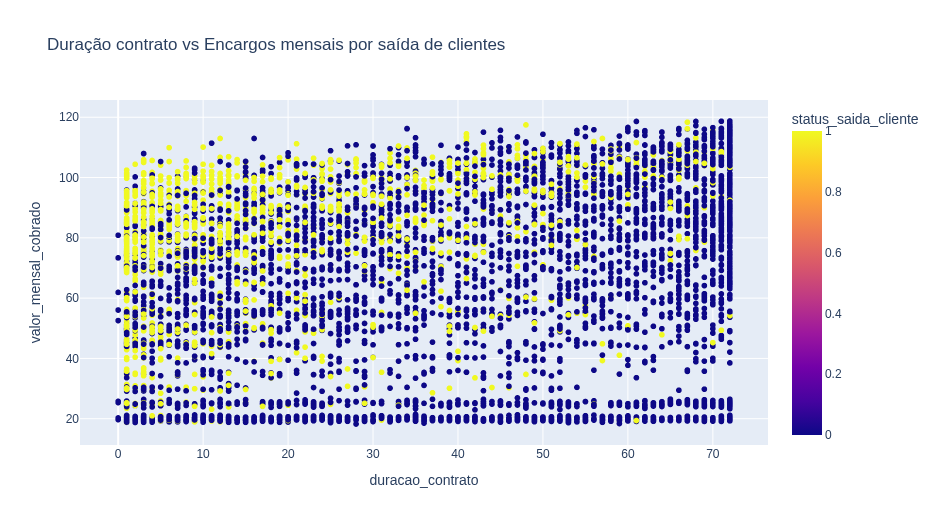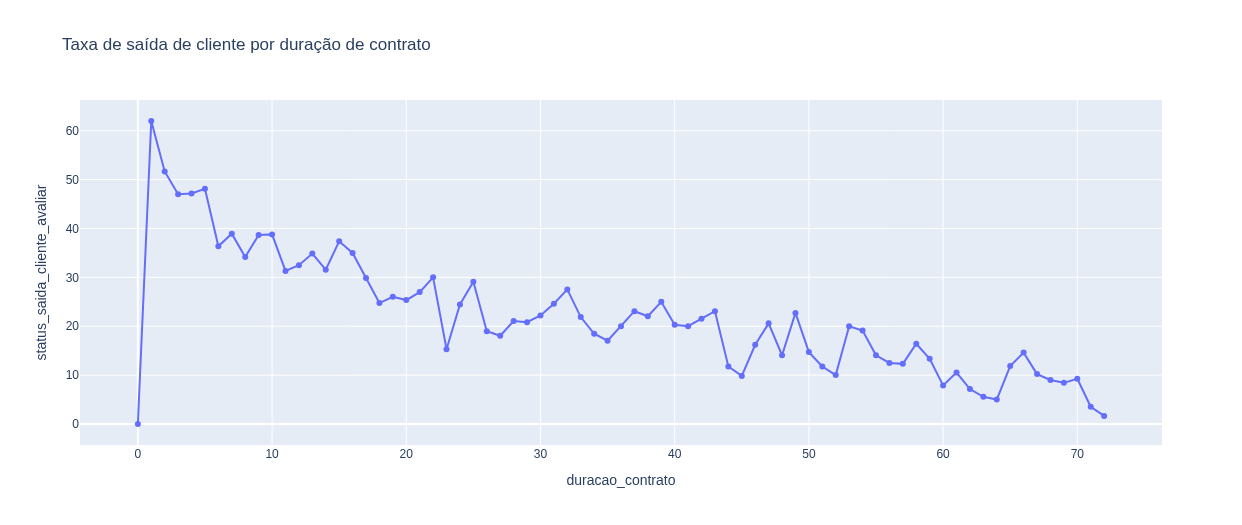

Análise da Relação entre Duração do Contrato e Evasão de Clientes
A partir dos gráficos gerados entre a variável duracao_contrato (tempo de permanência do cliente em meses) e status_saida_cliente_avaliar (indicador de evasão), foi possível observar uma tendência relevante sobre o comportamento dos clientes ao longo do tempo.

O gráfico **"Taxa de saída de cliente por duração de contrato"** mostra um pico acentuado de evasão no primeiro mês de contrato, indicando que muitos clientes decidem sair da empresa logo após a contratação inicial. Esse comportamento pode estar associado a problemas no processo de onboarding, falhas na comunicação de benefícios ou desalinhamento entre expectativa e experiência real do serviço.

Conforme o tempo de contrato avança, a quantidade de clientes que saem diminui progressivamente. Esse padrão sugere que clientes com maior tempo de permanência tendem a ser mais fiéis e menos propensos a abandonar o serviço. Ou seja, quanto maior o vínculo do cliente com a empresa, menor a taxa de churn.

Já o segundo gráfico **"Duração contrato vs Encargos mensais por saída de clientes"** mostra como a distribuição dos valores mensais varia com o tempo de permanência (tenure), e como isso se relaciona com a saída do cliente. O valor mensal não parece ser, isoladamente, um forte indicativo de saída — já que clientes com valores altos e baixos aparecem em ambos os grupos.

Essa análise reforça a importância de estratégias de retenção voltadas especialmente para os primeiros meses do ciclo de vida do cliente, com foco em garantir uma boa experiência inicial, suporte proativo e entrega de valor desde o início do contrato.
